In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load the data set

In [2]:
df=pd.read_csv('D:\\PGP IN DATA SCIENCE with Careerera\\Data Sets\\ML Simplilearn Datasets\\IBM Attrition Data.csv')
df.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


### Shape & Size of data

In [3]:
df.shape

(1470, 13)

In [4]:
df.size

19110

### Type of data

In [5]:
type(df)

pandas.core.frame.DataFrame

### Columns

In [6]:
df.columns

Index(['Age', 'Attrition', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EnvironmentSatisfaction', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'WorkLifeBalance', 'YearsAtCompany'],
      dtype='object')

### Data type of each columns

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Age                      1470 non-null   int64 
 1   Attrition                1470 non-null   object
 2   Department               1470 non-null   object
 3   DistanceFromHome         1470 non-null   int64 
 4   Education                1470 non-null   int64 
 5   EducationField           1470 non-null   object
 6   EnvironmentSatisfaction  1470 non-null   int64 
 7   JobSatisfaction          1470 non-null   int64 
 8   MaritalStatus            1470 non-null   object
 9   MonthlyIncome            1470 non-null   int64 
 10  NumCompaniesWorked       1470 non-null   int64 
 11  WorkLifeBalance          1470 non-null   int64 
 12  YearsAtCompany           1470 non-null   int64 
dtypes: int64(9), object(4)
memory usage: 149.4+ KB


### Null value count

In [8]:
df.isnull().sum()

Age                        0
Attrition                  0
Department                 0
DistanceFromHome           0
Education                  0
EducationField             0
EnvironmentSatisfaction    0
JobSatisfaction            0
MaritalStatus              0
MonthlyIncome              0
NumCompaniesWorked         0
WorkLifeBalance            0
YearsAtCompany             0
dtype: int64

### Unique values in Object columns

In [9]:
df.Attrition.unique()

array(['Yes', 'No'], dtype=object)

In [10]:
df.Department.unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [11]:
df.EducationField.unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [12]:
df.MaritalStatus.unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

### Age distribution of Employees

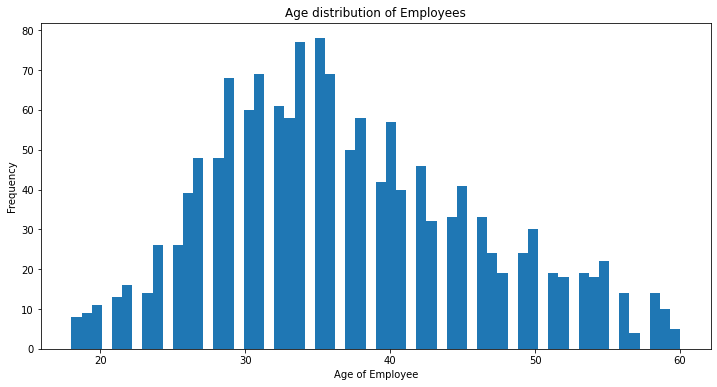

In [13]:
plt.figure(figsize=(12,6))
plt.hist(x='Age', data=df, bins=60)
plt.title("Age distribution of Employees")
plt.xlabel("Age of Employee")
plt.ylabel("Frequency")
plt.show()

**Lot of Employees are in Age range between 30 to 40**

### Attrition by age

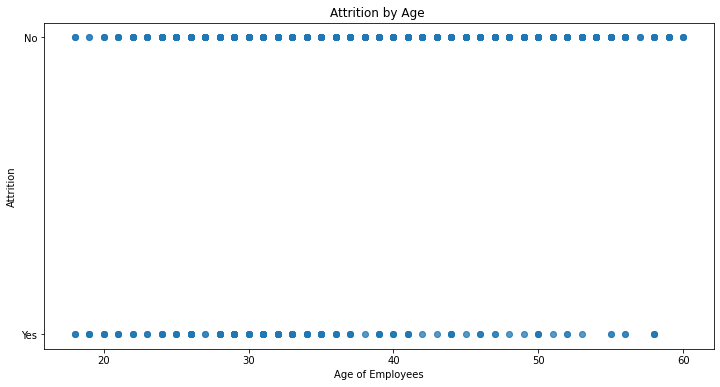

In [14]:
plt.figure(figsize=(12,6))
plt.scatter(x='Age', y='Attrition', data=df, alpha=0.5)
plt.title("Attrition by Age ")
plt.xlabel("Age of Employees")
plt.ylabel("Attrition")
plt.show()

### Attrition status count

In [15]:
df.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

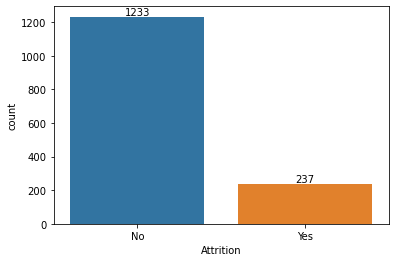

In [19]:
ax = sns.countplot(x='Attrition', data=df,
                  order=df.Attrition.value_counts(ascending=False).index)

abs_values = df['Attrition'].value_counts(ascending=False).values

ax.bar_label(container=ax.containers[0], labels=abs_values);

### Distribution of employees by the education field

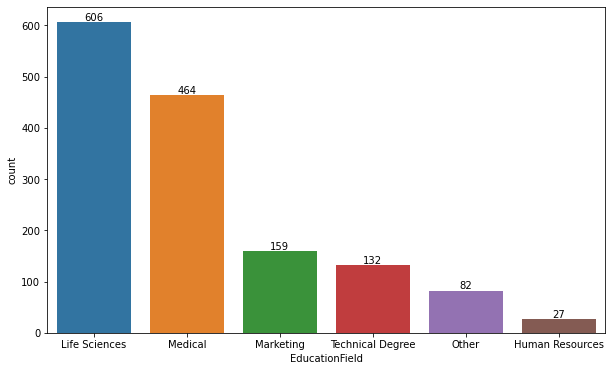

In [21]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x='EducationField', data=df,
                  order=df.EducationField.value_counts(ascending=False).index)

abs_values = df['EducationField'].value_counts(ascending=False).values

ax.bar_label(container=ax.containers[0], labels=abs_values);

**606 employees are from Life Science, 464 are from Medical field**

### Bar chart for the number of married and unmarried employees

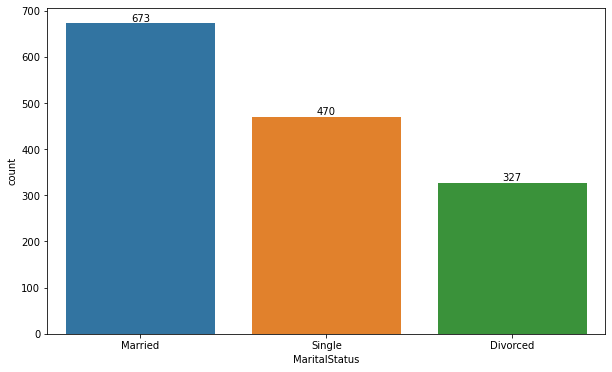

In [22]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x='MaritalStatus', data=df,
                  order=df.MaritalStatus.value_counts(ascending=False).index)

abs_values = df['MaritalStatus'].value_counts(ascending=False).values

ax.bar_label(container=ax.containers[0], labels=abs_values);

**673 Employees are Married**

### How many Employees are working in different department?

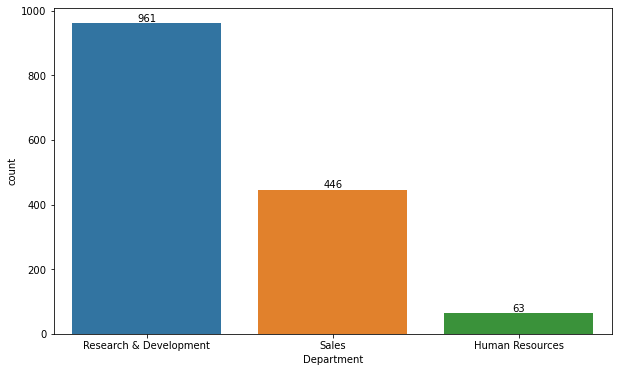

In [24]:
plt.figure(figsize=(10,6))
ax = sns.countplot(x='Department', data=df,
                  order=df.Department.value_counts(ascending=False).index)

abs_values = df['Department'].value_counts(ascending=False).values

ax.bar_label(container=ax.containers[0], labels=abs_values);

**961 Employees are working in Research & Development Department**

### Build up a logistic regression model to predict which employees are likely to attrite

Here our Target variable is Attrition

In [31]:
df.Attrition.dtype

dtype('O')

we need to convert object column to int with binary values

In [34]:
df.Attrition.value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [33]:
from sklearn.preprocessing import LabelEncoder

In [35]:
label_encoder=LabelEncoder()
df['Attrition']=label_encoder.fit_transform(df['Attrition'])
df.Attrition.value_counts()

0    1233
1     237
Name: Attrition, dtype: int64

Education field column is also object type so convert that to int

In [36]:
df.EducationField.value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

In [37]:
label_encoder=LabelEncoder()
df['EducationField']=label_encoder.fit_transform(df['EducationField'])
df.EducationField.value_counts()

1    606
3    464
2    159
5    132
4     82
0     27
Name: EducationField, dtype: int64

Department column is also an Object type so convert that to int

In [38]:
df.Department.value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

In [40]:
label_encoder=LabelEncoder()
df['Department']=label_encoder.fit_transform(df['Department'])
df.Department.value_counts()

1    961
2    446
0     63
Name: Department, dtype: int64

Marital Status column also an object type so convert that to int

In [41]:
df.MaritalStatus.value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

In [42]:
label_encoder=LabelEncoder()
df['MaritalStatus']=label_encoder.fit_transform(df['MaritalStatus'])
df.MaritalStatus.value_counts()

1    673
2    470
0    327
Name: MaritalStatus, dtype: int64

Lets Check the Data Type of our DatFrame

In [44]:
df.dtypes

Age                        int64
Attrition                  int32
Department                 int32
DistanceFromHome           int64
Education                  int64
EducationField             int32
EnvironmentSatisfaction    int64
JobSatisfaction            int64
MaritalStatus              int32
MonthlyIncome              int64
NumCompaniesWorked         int64
WorkLifeBalance            int64
YearsAtCompany             int64
EDepartment                int32
dtype: object

Now create dependent(y) & independent variable

In [45]:
X=df.drop('Attrition',axis=1).values
y=df.Attrition.values
print('Dependent Variable', y)
print('independent Variable', X)

Dependent Variable [1 0 1 ... 0 0 0]
independent Variable [[41  2  1 ...  1  6  2]
 [49  1  8 ...  3 10  1]
 [37  1  2 ...  3  0  1]
 ...
 [27  1  4 ...  3  6  1]
 [49  2  2 ...  2  9  2]
 [34  1  8 ...  4  4  1]]


Split our variable data into Train and Test set

In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.30, random_state=0)
print('X_train: ', X_train)
print('X_test: ', X_test)
print('y_train: ', y_train)
print('y_test: ', y_test)

X_train:  [[30  2  5 ...  3 10  2]
 [33  2  5 ...  3  1  2]
 [45  0 24 ...  3  6  0]
 ...
 [43  2  2 ...  3 10  2]
 [38  1  2 ...  1  1  1]
 [40  2 10 ...  2  1  2]]
X_test:  [[36  2 10 ...  2 10  2]
 [33  1 25 ...  3  5  1]
 [35  2 18 ...  2  4  2]
 ...
 [40  2 28 ...  3  1  2]
 [52  1  3 ...  3  5  1]
 [33  1  7 ...  4 13  1]]
y_train:  [0 1 0 ... 0 0 0]
y_test:  [0 0 1 0 1 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 1 0 0 0 0 0 0 1 0 0 1 1 0 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0
 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0

Create logistic regression model & fit the data to our our

In [52]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model=model.fit(X_train,y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Compare predected values and actual values

In [56]:
pred=model.predict(X_test)

In [57]:
print('Predicted Values', pred)
print('Actual Values', y_test)

Predicted Values [0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Actual Values [0 0 1 0 1 0 1 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0

Check how accurate our model is

In [54]:
model.score(X_train,y_train)

0.8425655976676385

Check Accuracy Score

In [58]:
from sklearn import metrics

print(metrics.accuracy_score(y_test, pred))

0.8412698412698413


Lets print Confusion matrix

In [60]:
print(metrics.confusion_matrix(y_test, pred))

[[367   4]
 [ 66   4]]


Lets print Classification Report

In [61]:
print(metrics.classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91       371
           1       0.50      0.06      0.10        70

    accuracy                           0.84       441
   macro avg       0.67      0.52      0.51       441
weighted avg       0.79      0.84      0.78       441

